In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


## Importing data and processing to create a dataset

In [2]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving GOOG (2).csv to GOOG (2).csv


In [3]:
data = pd.read_csv('GOOG (2).csv' , date_parser=True)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-09-01,269.365356,270.899597,264.618134,265.255768,265.255768,4849108
1,2011-09-02,261.255737,262.974304,259.392731,261.440063,261.440063,4820401
2,2011-09-06,254.446274,260.403931,254.296829,260.115021,260.115021,5451959
3,2011-09-07,264.234589,266.969330,262.715271,266.017914,266.017914,5532259
4,2011-09-08,265.903320,268.543427,264.956879,266.481171,266.481171,4778845


In [5]:
data.shape

(2516, 7)

In [6]:
data_train = data[data['Date'] < '2020-09-01'].copy()
data_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-09-01,269.365356,270.899597,264.618134,265.255768,265.255768,4849108
1,2011-09-02,261.255737,262.974304,259.392731,261.440063,261.440063,4820401
2,2011-09-06,254.446274,260.403931,254.296829,260.115021,260.115021,5451959
3,2011-09-07,264.234589,266.969330,262.715271,266.017914,266.017914,5532259
4,2011-09-08,265.903320,268.543427,264.956879,266.481171,266.481171,4778845
...,...,...,...,...,...,...,...
2259,2020-08-25,1582.069946,1611.619995,1582.069946,1608.219971,1608.219971,2247100
2260,2020-08-26,1608.000000,1659.219971,1603.599976,1652.380005,1652.380005,3993400
2261,2020-08-27,1653.680054,1655.000000,1625.750000,1634.329956,1634.329956,1861600
2262,2020-08-28,1633.489990,1647.170044,1630.750000,1644.410034,1644.410034,1499000


In [7]:
data_test = data[data['Date'] >= '2020-09-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
2264,2020-09-01,1636.630005,1665.729980,1632.219971,1660.709961,1660.709961,1825300
2265,2020-09-02,1673.775024,1733.180054,1666.329956,1728.280029,1728.280029,2511200
2266,2020-09-03,1709.713989,1709.713989,1615.060059,1641.839966,1641.839966,3107800
2267,2020-09-04,1624.260010,1645.109985,1547.613037,1591.040039,1591.040039,2608600
2268,2020-09-08,1533.510010,1563.864990,1528.010010,1532.390015,1532.390015,2610900
...,...,...,...,...,...,...,...
2511,2021-08-25,2857.659912,2866.260010,2848.790039,2859.000000,2859.000000,641900
2512,2021-08-26,2852.370117,2862.696045,2841.830078,2842.459961,2842.459961,746100
2513,2021-08-27,2842.250000,2900.219971,2840.399902,2891.010010,2891.010010,1228100
2514,2021-08-30,2894.090088,2929.790039,2892.000000,2909.389893,2909.389893,845800


In [8]:


training_set = data_train.iloc[:,4:5]

In [187]:
training_set

,Close
0,265.255768
1,261.440063
2,260.115021
3,266.017914
4,266.481171
...,...
2259,1608.219971
2260,1652.380005
2261,1634.329956
2262,1644.410034


In [9]:
#Scaling
scaler = MinMaxScaler()
training_set_scaled = scaler.fit_transform(training_set)

In [10]:
#Creating Dataset
X_train = []
Y_train=[]

#Consider previous 100 days to predict the output of 101 day , (change and check while training model)

for i in range(100 , training_set_scaled.shape[0]):
  X_train.append(training_set_scaled[i - 100:i])
  Y_train.append(training_set_scaled[i,0])

In [11]:
X_train , Y_train = np.array(X_train) , np.array(Y_train)

In [12]:
X_train.shape , Y_train.shape

((2164, 100, 1), (2164,))

# Creating RNN (LSTM) Model to predict Price

In [13]:
regressor_model = tf.keras.Sequential()


In [14]:
regressor_model.add(tf.keras.layers.LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor_model.add(tf.keras.layers.Dropout(rate = 0.20))

In [15]:
regressor_model.add(tf.keras.layers.LSTM(units = 60, return_sequences = True ))
regressor_model.add(tf.keras.layers.Dropout(rate = 0.20))

regressor_model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True ))
regressor_model.add(tf.keras.layers.Dropout(rate = 0.20))

regressor_model.add(tf.keras.layers.LSTM(units = 120, return_sequences = False ))
regressor_model.add(tf.keras.layers.Dropout(rate = 0.20))

In [16]:
regressor_model.add(tf.keras.layers.Dense(units=1))

In [17]:
regressor_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 60)           14880     
_________________________________________________________________
dropout (Dropout)            (None, 100, 60)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

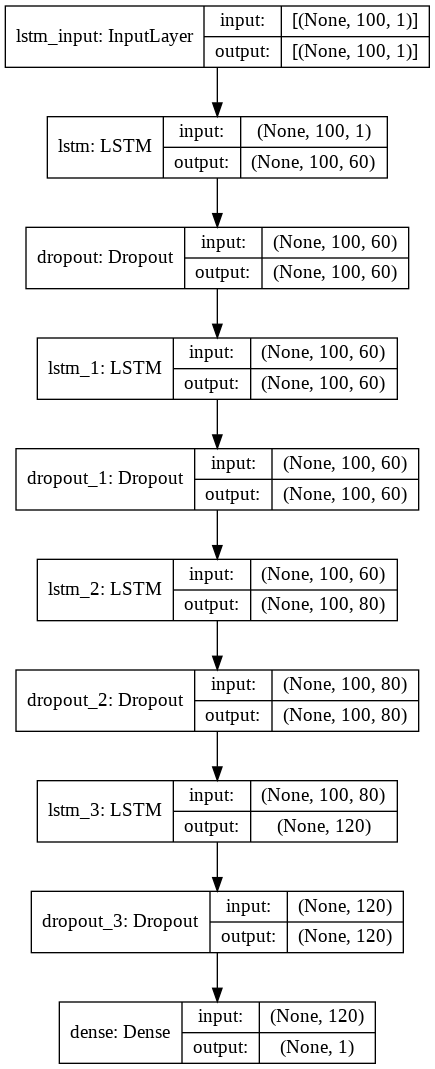

In [18]:
tf.keras.utils.plot_model(regressor_model,show_shapes=True)

In [221]:
regressor_model.compile(loss='mean_squared_error' , optimizer='adam')

In [222]:
regressor_model.fit(X_train , Y_train , epochs=30 , batch_size=32)

Epoch 1/30
68/68 [==============================] - 24s 273ms/step - loss: 0.0164
Epoch 2/30
68/68 [==============================] - 19s 275ms/step - loss: 0.0020
Epoch 3/30
68/68 [==============================] - 19s 273ms/step - loss: 0.0022
Epoch 4/30
68/68 [==============================] - 19s 276ms/step - loss: 0.0019
Epoch 5/30
68/68 [==============================] - 19s 277ms/step - loss: 0.0026
Epoch 6/30
68/68 [==============================] - 19s 273ms/step - loss: 0.0019
Epoch 7/30
68/68 [==============================] - 19s 274ms/step - loss: 0.0017
Epoch 8/30
68/68 [==============================] - 19s 274ms/step - loss: 0.0016
Epoch 9/30
68/68 [==============================] - 19s 272ms/step - loss: 0.0018
Epoch 10/30
68/68 [==============================] - 19s 273ms/step - loss: 0.0017
Epoch 11/30
68/68 [==============================] - 19s 272ms/step - loss: 0.0017
Epoch 12/30
68/68 [==============================] - 19s 273ms/step - loss: 0.0016
Epoch 13/30
6

# Preparing Test Data Set

In [223]:
testing_prep = data_train.tail(100)

In [224]:
testing_prep

,Date,Open,High,Low,Close,Adj Close,Volume
2164,2020-04-09,1224.079956,1225.569946,1196.734985,1211.449951,1211.449951,2175400
2165,2020-04-13,1209.180054,1220.510010,1187.598022,1217.560059,1217.560059,1739800
2166,2020-04-14,1245.089966,1282.069946,1236.930054,1269.229980,1269.229980,2470400
2167,2020-04-15,1245.609985,1280.459961,1240.400024,1262.469971,1262.469971,1671700
2168,2020-04-16,1274.099976,1279.000000,1242.619995,1263.469971,1263.469971,2518100
...,...,...,...,...,...,...,...
2259,2020-08-25,1582.069946,1611.619995,1582.069946,1608.219971,1608.219971,2247100
2260,2020-08-26,1608.000000,1659.219971,1603.599976,1652.380005,1652.380005,3993400
2261,2020-08-27,1653.680054,1655.000000,1625.750000,1634.329956,1634.329956,1861600
2262,2020-08-28,1633.489990,1647.170044,1630.750000,1644.410034,1644.410034,1499000


In [225]:
testing_prep = testing_prep.append(data_test , ignore_index=True)

In [226]:
testing_set = testing_prep.iloc[:,4:5]
testing_prep.shape

(352, 7)

In [227]:
testing_set.shape
testing_set = scaler.transform(testing_set)
testing_set

array([[0.68629251],
       [0.69063966],
       [0.72740114],
       [0.72259161],
       [0.72330307],
       [0.73737593],
       [0.72553709],
       [0.6897716 ],
       [0.72311809],
       [0.73243838],
       [0.73457279],
       [0.73213241],
       [0.70210139],
       [0.77880468],
       [0.78391305],
       [0.76395635],
       [0.76836038],
       [0.78565611],
       [0.78294547],
       [0.80091715],
       [0.81216541],
       [0.82275917],
       [0.80317957],
       [0.78438968],
       [0.7892277 ],
       [0.80136529],
       [0.80901357],
       [0.8015752 ],
       [0.82522082],
       [0.82243192],
       [0.8278533 ],
       [0.83254897],
       [0.83313234],
       [0.83234262],
       [0.84101546],
       [0.84307864],
       [0.84834352],
       [0.84632298],
       [0.82910549],
       [0.84775304],
       [0.85360128],
       [0.86039583],
       [0.86728991],
       [0.82317179],
       [0.82981696],
       [0.8345624 ],
       [0.85083366],
       [0.856

In [228]:
X_test = []
Y_test = []

for i in range(100 , testing_set.shape[0]):
  X_test.append(testing_set[i - 100:i])
  Y_test.append(testing_set[i,0])

In [229]:
X_test , Y_test = np.array(X_test) , np.array(Y_test)

# Predicting Output and Vizualization


In [230]:
Y_pred = regressor_model.predict(X_test)

In [231]:
Y_pred

array([[1.0089955 ],
       [1.015834  ],
       [1.0231894 ],
       [1.0290878 ],
       [1.0304478 ],
       [1.0244147 ],
       [1.0119183 ],
       [0.9946221 ],
       [0.9746901 ],
       [0.9544615 ],
       [0.93661726],
       [0.92238784],
       [0.91163325],
       [0.9030843 ],
       [0.8952296 ],
       [0.8884364 ],
       [0.88200283],
       [0.8761188 ],
       [0.8716372 ],
       [0.8696692 ],
       [0.8707595 ],
       [0.8746998 ],
       [0.8812922 ],
       [0.88890946],
       [0.89684993],
       [0.9035645 ],
       [0.90829784],
       [0.91157824],
       [0.91475606],
       [0.92007196],
       [0.9283252 ],
       [0.93881804],
       [0.9498296 ],
       [0.960119  ],
       [0.9675187 ],
       [0.9716087 ],
       [0.97378546],
       [0.97580725],
       [0.97931194],
       [0.98308957],
       [0.9863638 ],
       [0.98589706],
       [0.98200774],
       [0.9774477 ],
       [0.9743641 ],
       [0.97446954],
       [0.9811521 ],
       [0.995

In [232]:
Y_test = np.array(Y_test)
Y_test

array([1.00592649, 1.05400042, 0.9925011 , 0.9563586 , 0.914631  ,
       0.93211172, 0.91436776, 0.90632814, 0.90530367, 0.92106973,
       0.90645624, 0.88840631, 0.86312072, 0.84260914, 0.86701243,
       0.83126118, 0.84056723, 0.85242734, 0.86634369, 0.8697658 ,
       0.86995791, 0.88453588, 0.86200375, 0.88164025, 0.85846057,
       0.86333419, 0.88157624, 0.90241507, 0.94078456, 0.94258459,
       0.94002324, 0.93365564, 0.94353081, 0.91621044, 0.93137898,
       0.95797364, 0.97364009, 0.99190349, 0.95593877, 0.96576418,
       0.90341114, 0.93942563, 0.97768126, 0.98125284, 0.99845608,
       1.0688345 , 1.07896579, 1.07781322, 1.07870255, 1.06261628,
       1.07138152, 1.06933961, 1.08867734, 1.09177933, 1.08378956,
       1.06716257, 1.07935713, 1.06389687, 1.05868184, 1.08288599,
       1.08470026, 1.10018172, 1.07709463, 1.10367505, 1.12491234,
       1.12407286, 1.12494083, 1.11888623, 1.11822462, 1.09373587,
       1.08747492, 1.09205682, 1.07661088, 1.08209627, 1.07870

In [233]:
s = scaler.scale_
f = 1/s
f

array([1405.545197])

In [234]:
Y_pred = Y_pred * f

In [235]:
Y_test = Y_test * f

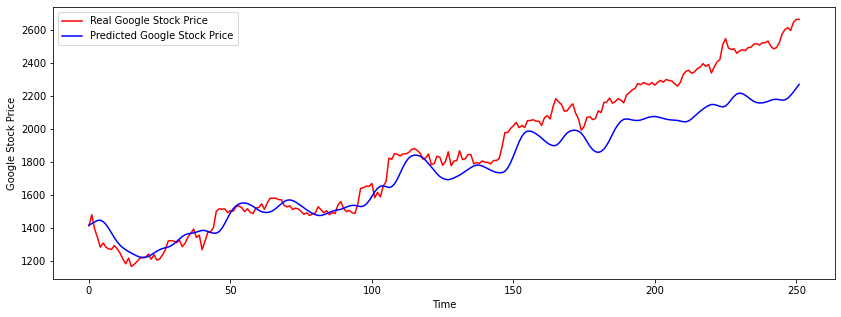

In [236]:
plt.figure(figsize=(14,5))
plt.plot(Y_test , color = 'red' , label = "Real Google Stock Price")
plt.plot(Y_pred  , color = 'blue' , label = "Predicted Google Stock Price")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()